In [158]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [159]:
!ls "/gdrive/My Drive/colab/titanic"

gender_submission.csv  test.csv  train.csv


In [160]:
import pandas as pd                 
import matplotlib.pyplot as plt  # 시각화를 위한 라이브러리
import numpy as np                 # 벡터 및 행렬 연산을 위한 라이브러리
import seaborn as sns              # 고급 시각화 라이브러리mport pandas as pd          
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline
titanic = pd.read_csv("/gdrive/My Drive/colab/titanic/train.csv")

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [161]:
titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


survived 생존여부 (0= No,1= Yes)

pclass 등석 (1= 1등석, 2= 2등석, 3= 3등석)

sex 성별

Age 나이

sibsp 같이 탑승한 형제자매 또는 배우자 인원수

parch 같이 탑승한 부모 또는 어린이 수

ticket 티켓 번호

fare 요금

cabin 선실 번호

embarked 중간 정착 항구 C = Cherbourg, Q = Queenstown, S = Southampton

In [162]:
titanic['Pclass'].value_counts()
# 각 등석의 사람 수

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [163]:
titanic['Cabin'].value_counts()
# 선실번호 사람 수
# 너무 많은 선실번호로 분석 기준을 잡기 어려움

C23 C25 C27    4
G6             4
B96 B98        4
E101           3
C22 C26        3
              ..
C54            1
B30            1
C45            1
C30            1
D30            1
Name: Cabin, Length: 147, dtype: int64

In [164]:
titanic['Embarked'].value_counts()
# 중간정착 항구별 사람 수

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [165]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

데이터 누락 찾기!

누락 데이터가 존재하면 기계학습 과정에서 문제 발생할 수 있음

titanic.info()에서 확인

맨 처음 info에서는 Age, Cabin, Embarked에서 데이터 누락이 확인되었지만,

무의미한 데이터를 제거한 후 남은 Age와 Embarked에 대해서 데이터 누락을 처리해줘야함

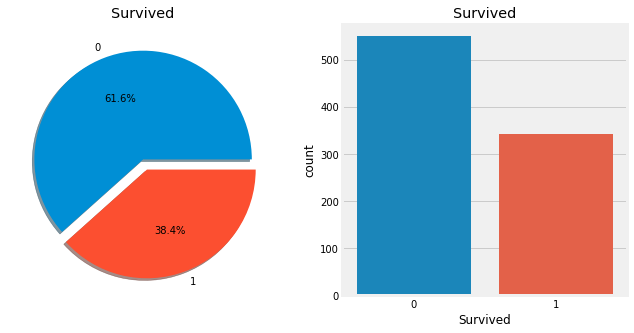

In [166]:
# 생존을 기준으로 차트 나타내기
f, ax = plt.subplots(1,2,figsize=(10,5))

titanic['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow = True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=titanic, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [167]:
# 성별로 생존 여부 나타내기
titanic.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

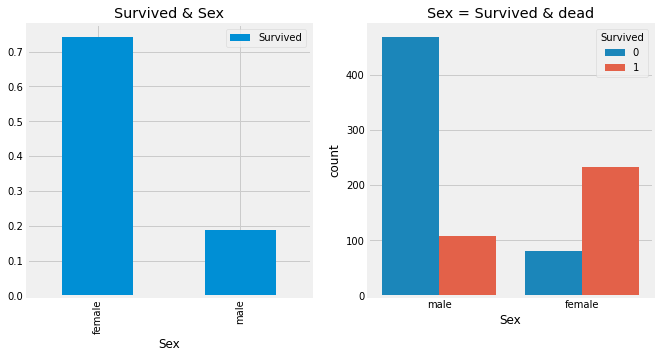

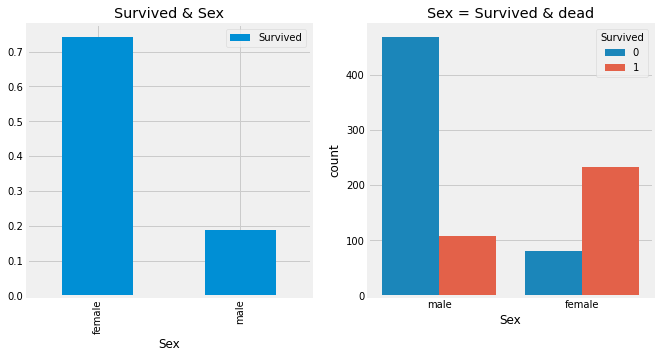

In [168]:
# 성별로 생존 여부 나타내기 성별로 생존 여부 나타내기
f, ax = plt.subplots(1,2, figsize=(10,5))
titanic[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived & Sex')
sns.countplot('Sex',hue='Survived', data=titanic, ax=ax[1])
ax[1].set_title('Sex = Survived & dead')
plt.show()
f, ax = plt.subplots(1,2, figsize=(10,5))
titanic[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived & Sex')
sns.countplot('Sex',hue='Survived', data=titanic, ax=ax[1])
ax[1].set_title('Sex = Survived & dead')
plt.show()

In [169]:
# 탑승 클래스를 기준으로 데이터 나누기
# crosstab으로 (x,y)를 통해 보여줌
pd.crosstab(titanic.Pclass, titanic.Survived, margins=True).style.background_gradient(cmap='autumn_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


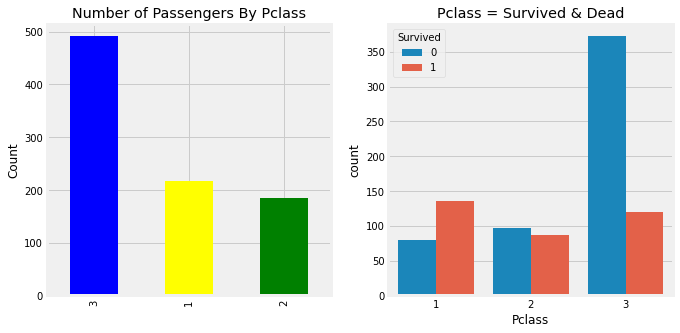

In [170]:
f, ax = plt.subplots(1,2, figsize=(10,5)) 
titanic['Pclass'].value_counts().plot.bar(color=['blue','yellow','green'], ax=ax[0]) 
ax[0].set_title('Number of Passengers By Pclass') 
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=titanic, ax=ax[1]) 
ax[1].set_title('Pclass = Survived & Dead') 
plt.show()

In [171]:
pd.crosstab([titanic.Sex,titanic.Survived], titanic.Pclass, margins=True).style.background_gradient(cmap='winter_r')

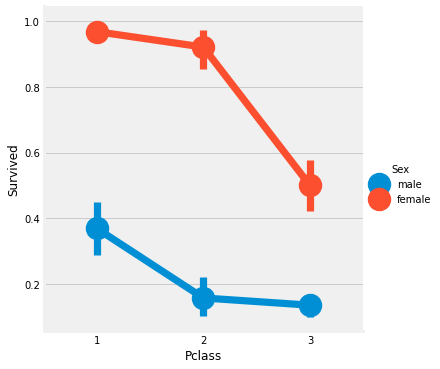

In [172]:
sns.factorplot('Pclass','Survived', hue='Sex', data=titanic)
plt.show()

위의 그래프를 보면, 클래스 여부 상관 없이 여성이 더 많이 살아남았다.

여성 생존자 중 3등석 여성 생존자 수는 1,2등석 여성 생존자 수보다 현저히 적은걸 알 수 있다.

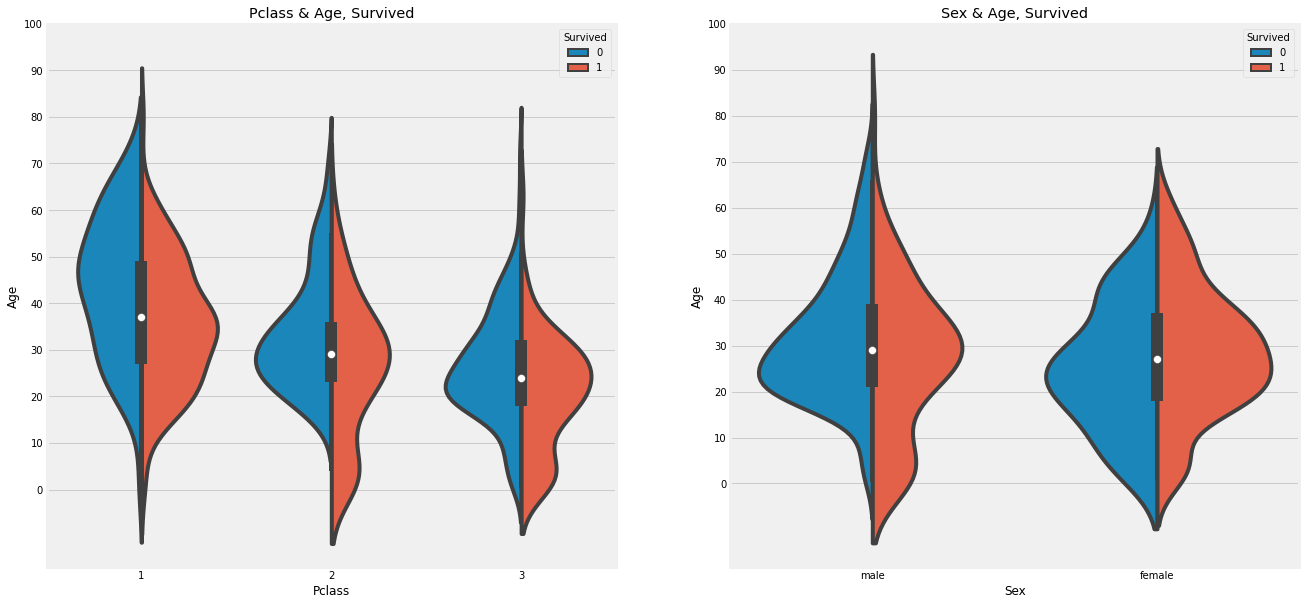

In [173]:
# 연령별로 분석하기
f, ax = plt.subplots(1,2, figsize = (20,10))
sns.violinplot('Pclass', 'Age', hue='Survived', data=titanic, split=True, ax=ax[0])
ax[0].set_title('Pclass & Age, Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot('Sex','Age', hue='Survived', split=True, data=titanic, ax=ax[1])
ax[1].set_title('Sex & Age, Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

연령별로 분석하기

연령은 연속적입 값이기 때문에 yticks 또는 xticks를 사용

seaborn에 violinplot 또는 distplot 사용

In [175]:
titanic['Initial'] = 0
for data in titanic:
  titanic['Initial'] = titanic.Name.str.extract('([A-Za-z]+)\.')


In [151]:
titanic['Initial'].head(10)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Initial, dtype: object

In [176]:
titanic['Initial'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Lady          1
Jonkheer      1
Capt          1
Don           1
Countess      1
Sir           1
Ms            1
Mme           1
Name: Initial, dtype: int64

In [177]:
titanic['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [178]:
titanic['Initial'].value_counts()

Mr        529
Miss      186
Mrs       127
Master     40
Other       9
Name: Initial, dtype: int64

In [179]:
titanic.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

Age의 Null 값이 많았기 때문에 값을 채워줘야 오류 발생을 줄일 수 있는데,

일반적으로 전체 나이의 평균을 대입하기보다, 이니셜 별로 나이를 나누어 평균을 나이 평균을 구해준다

In [180]:
# 데이터 채워주기
titanic.loc[(titanic.Age.isnull())&(titanic.Initial=='Mr'),'Age']=33
titanic.loc[(titanic.Age.isnull())&(titanic.Initial=='Mrs'),'Age']=36
titanic.loc[(titanic.Age.isnull())&(titanic.Initial=='Master'),'Age']=5
titanic.loc[(titanic.Age.isnull())&(titanic.Initial=='Miss'),'Age']=22
titanic.loc[(titanic.Age.isnull())&(titanic.Initial=='Other'),'Age']=46

In [181]:
titanic.Age.isnull().sum()

0

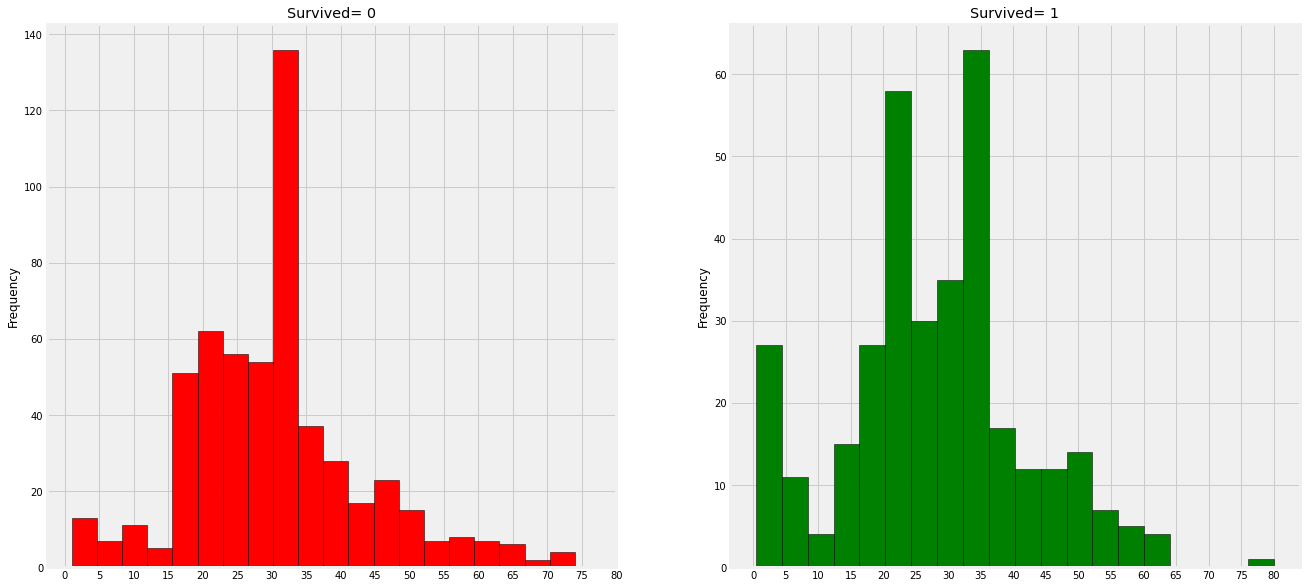

In [182]:
# 살아남은 인원과 살아남지 못한 인원 연령별로 그래프 나타내기
f,ax=plt.subplots(1,2,figsize=(20,10))
titanic[titanic['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
titanic[titanic['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

In [183]:
pd.crosstab([titanic.Embarked,titanic.Pclass], [titanic.Sex, titanic.Survived], margins=True).style.background_gradient(cmap='summer_r')

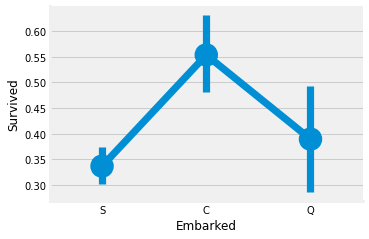

In [184]:
sns.factorplot('Embarked','Survived', data=titanic)
fig = plt.gcf()
fig.set_size_inches(5,3)
plt.show()

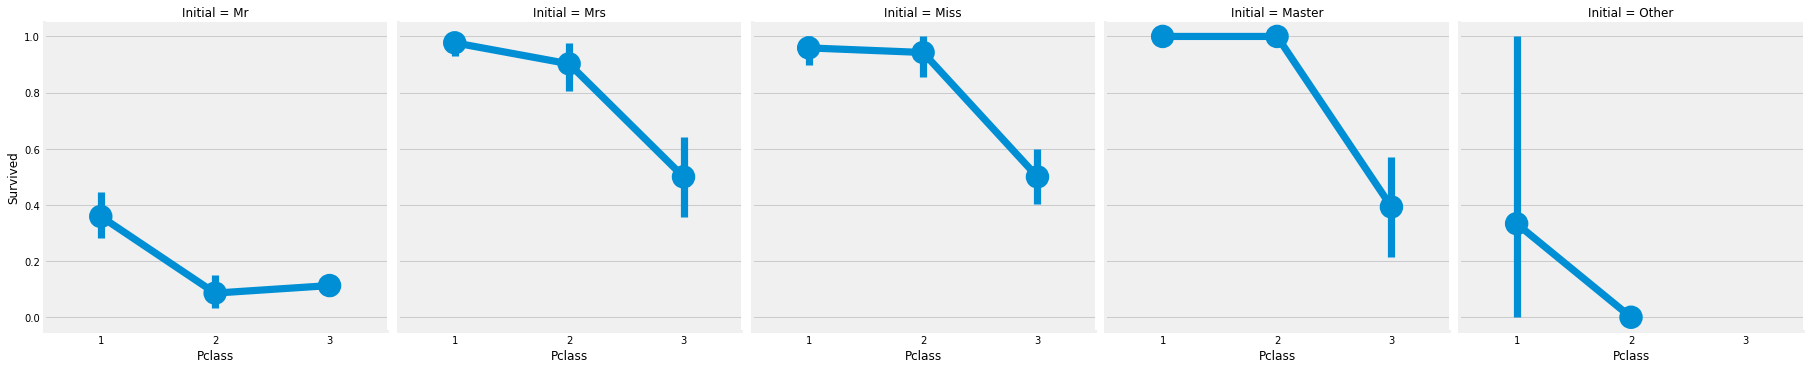

In [185]:
sns.factorplot('Pclass','Survived',col='Initial',data=titanic)
plt.show()

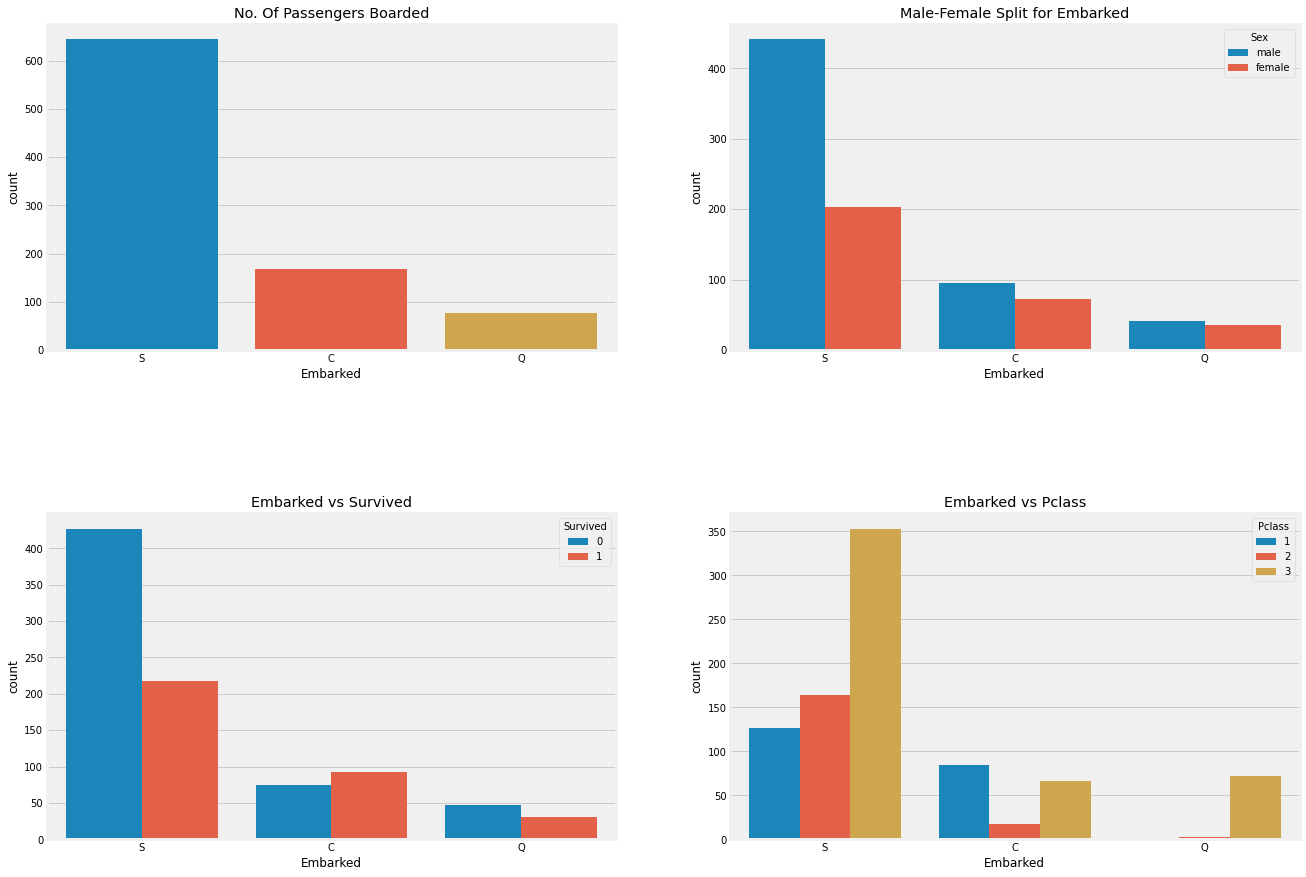

In [186]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=titanic,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=titanic,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=titanic,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=titanic,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

좌상 그래프 : 각 항구별로 탑승한 인원의 수를 나타냄

우상 그래프 : 각 항구별로 탑승한 인원을 성별로 나누어 나타냄

좌하 그래프 : 각 항구별 탑승 인원에 대해서 살아남은 사람과 살아남지 못한 사람을 나타냄

우하 그래프 : 각 항구별 탑승 인원에 대해 각 등석 인원에 대해 나타냄

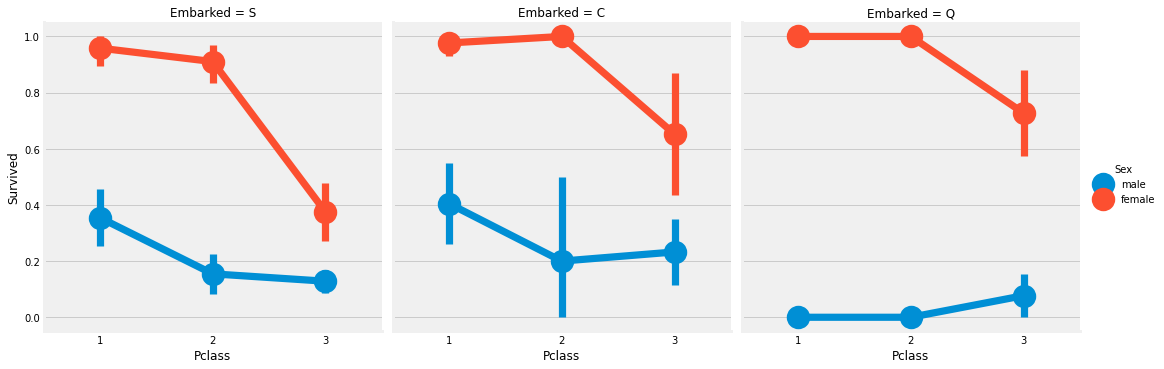

In [187]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=titanic)
plt.show()

각 항구별 탑승 인원을 성별로 나누어 살아남은 비율을 나타낼 때, S항구의 여성들은 많이 살아남지 못했음

In [188]:
# Embarked에 NaN 데이터가 있는데, 대부분의 탑승객들은 S항구에서 탑승했기 때문에 S값으로 채워준다.
titanic['Embarked'].fillna('S', inplace=True)
titanic['Embarked'].isnull().sum()

0

In [189]:
# 형제, 자매, 배우자 수 합
pd.crosstab([titanic.SibSp],titanic.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


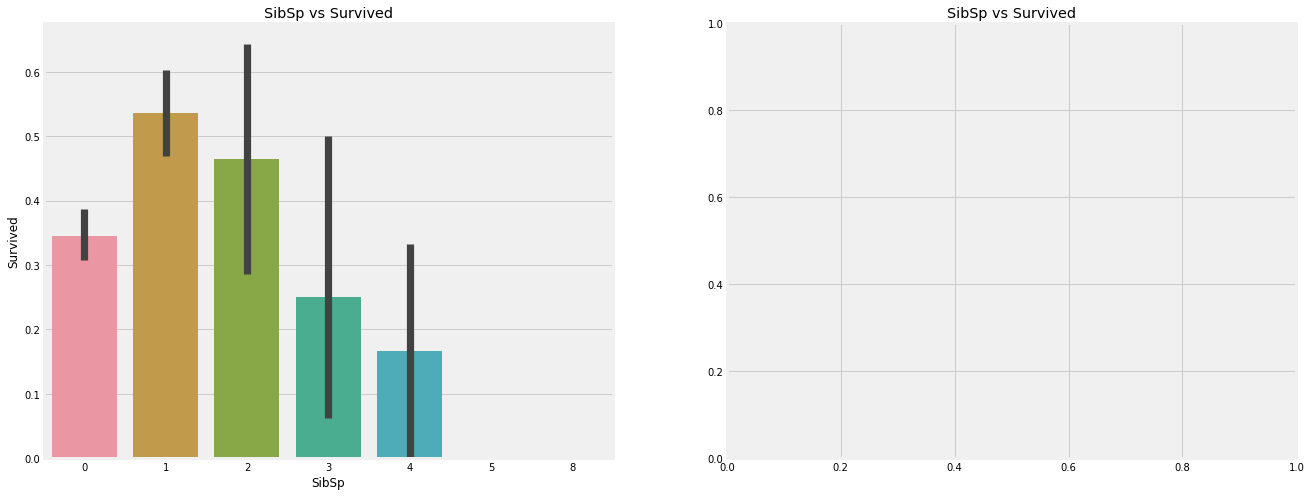

In [190]:
f,ax=plt.subplots(1,2,figsize=(20,8))

sns.barplot('SibSp','Survived',data=titanic,ax=ax[0])
ax[0].set_title('SibSp vs Survived')

sns.factorplot('SibSp','Survived',data=titanic,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [191]:
pd.crosstab(titanic.SibSp,titanic.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [192]:
pd.crosstab(titanic.Parch,titanic.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


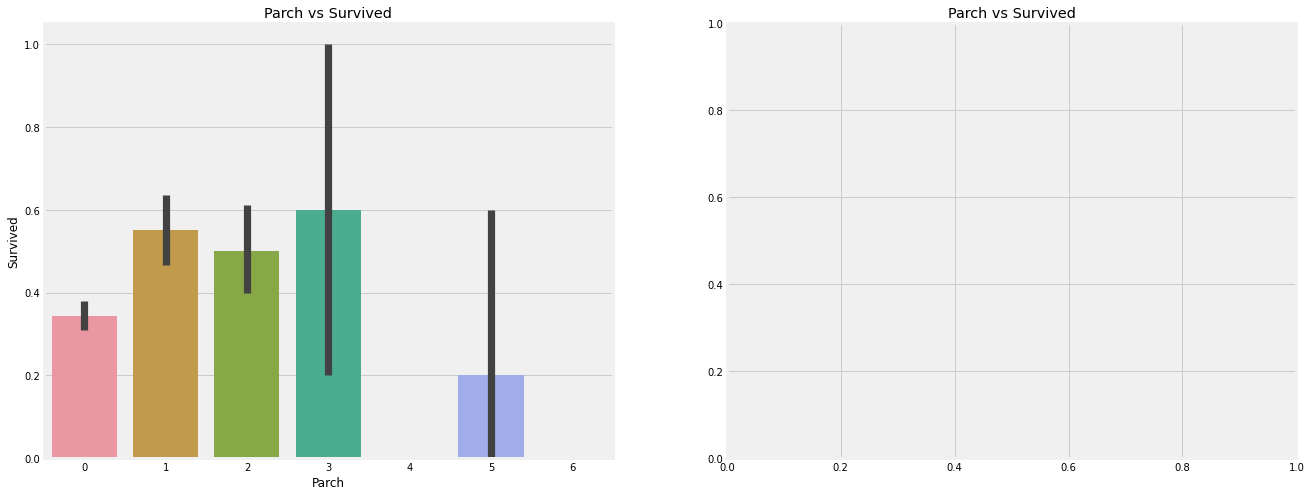

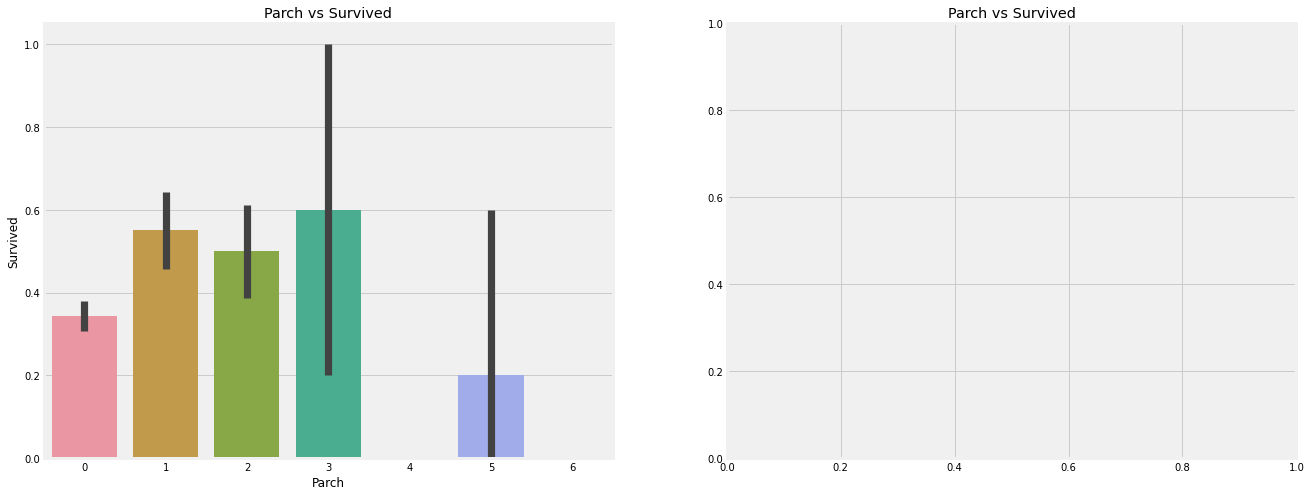

In [193]:
# Parch 부모,자녀 수를 나타냄 Parch 부모,자녀 수를 나타냄
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch','Survived',data=titanic,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch','Survived',data=titanic,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch','Survived',data=titanic,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch','Survived',data=titanic,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

In [194]:
# 가격 뽑아내기
print('Highest Fare was:',titanic['Fare'].max())
print('Lowest Fare was:',titanic['Fare'].min())
print('Average Fare was:',titanic['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


평균은 32인데 가격차가 많이 나고 있음. 이런 것들은 이상치 데이터라고 하는데 처리해주는 것이 좋다

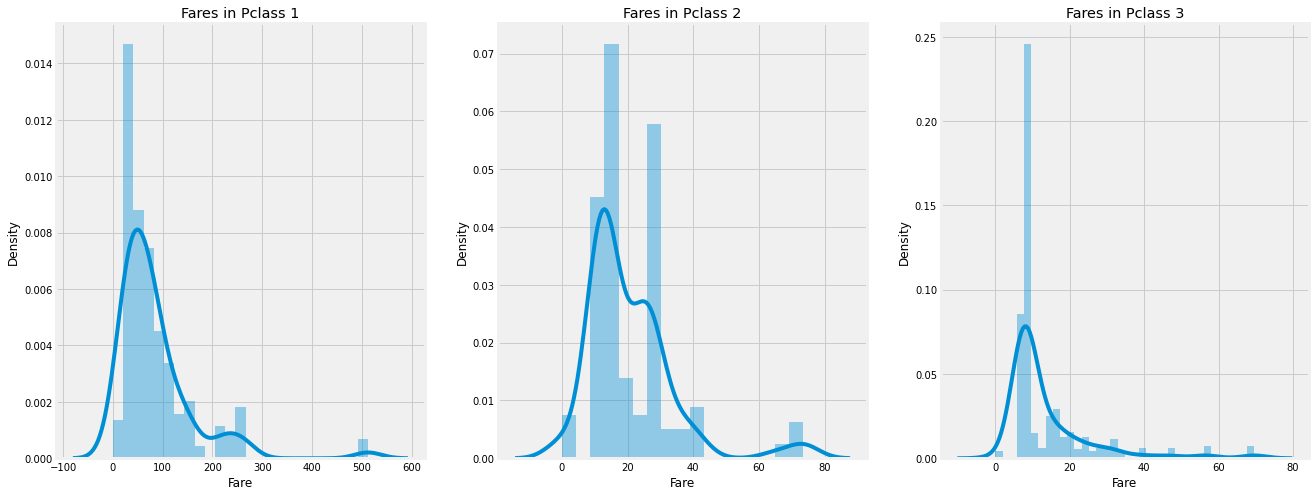

In [195]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(titanic[titanic['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(titanic[titanic['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(titanic[titanic['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

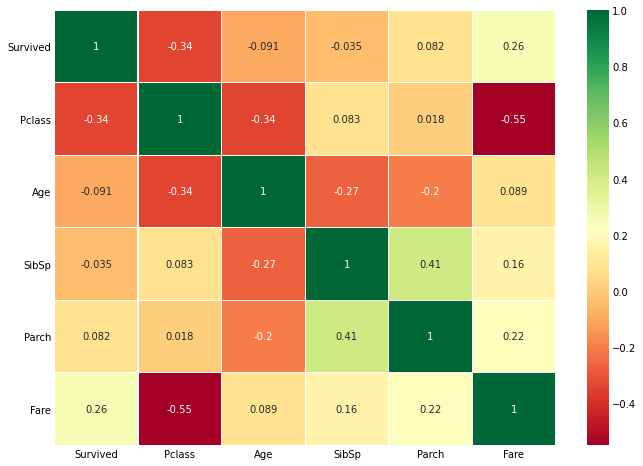

In [199]:
sns.heatmap(titanic.drop('PassengerId', axis=1).corr(), annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [218]:
del titanic

In [281]:
train = pd.read_csv("/gdrive/My Drive/colab/titanic/train.csv")
test = pd.read_csv("/gdrive/My Drive/colab/titanic/test.csv")

In [282]:
train_test = [train,test]

In [238]:
print(train_test[0].shape)
print(train_test[1].shape)

(891, 13)
(418, 12)


In [283]:
import re
for data in train_test:
        data['Initial'] = ''
        init = []
        p = re.compile('([A-Za-z]+)\.')
        for value in data['Name']:
                init.append(p.search(value).group())
        data['Initial'] = init

In [284]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


In [285]:
train['Initial'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Col.           2
Major.         2
Mme.           1
Ms.            1
Capt.          1
Jonkheer.      1
Sir.           1
Countess.      1
Lady.          1
Don.           1
Name: Initial, dtype: int64

In [286]:
pre = ['Mr','Miss','Mrs','Master','Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona']
aft =  ['Mr','Miss','Mrs','Master','Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Other']
for data in train_test:
        data['Initial'].replace(['Mr.','Miss.','Mrs.','Master.','Mlle.','Mme.','Ms.','Dr.','Major.','Lady.','Countess.','Jonkheer.','Col.','Rev.','Capt.','Sir.','Don.','Dona.'],
                             ['Mr','Miss','Mrs','Master','Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Other'],inplace=True)

In [288]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs


In [289]:
train.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [290]:
# Age 빈데이터를 채워준다
for data in train_test:
  data.loc[(data['Age'].isnull())&(data['Initial'] =='Master'),'Age']=5
  data.loc[(data['Age'].isnull())&(data['Initial'] =='Miss'),'Age']=22
  data.loc[(data['Age'].isnull())&(data['Initial'] =='Mr'),'Age']=33
  data.loc[(data['Age'].isnull())&(data['Initial'] =='Mrs'),'Age']=36
  data.loc[(data['Age'].isnull())&(data['Initial'] =='other'),'Age']=46

In [291]:
print(train['Age'].isnull().sum())
print(test['Age'].isnull().sum())

0
0


In [294]:
mapping = {
    'Mr' : 1,
    'Miss' : 2,
    'Mrs' : 3,
    'Master' : 4,
    'Other' : 5
}

In [295]:
# 이니셜을 숫자로 매핑 해준다 기계학습은 숫자로 이루어짐 이니셜을 숫자로 매핑 해준다 기계학습은 숫자로 이루어짐

for data in train_test:
  data['Initial'] = data['Initial'].map(mapping).astype(int)

for data in train_test:
  data['Initial'] = data['Initial'].map(mapping).astype(int)

ValueError: ignored

In [296]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [269]:
train['Sex'].value_counts()

nan    891
Name: Sex, dtype: int64

In [297]:
mapping = {
    'female' : 1,
    'male' : 0
}

In [298]:
for data in train_test:
  data['Sex'] = data['Sex'].map(mapping).astype(int)

In [299]:
train['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [300]:
test['Sex'].value_counts()

0    266
1    152
Name: Sex, dtype: int64

In [301]:
for data in train_test:
  data['Embarked'].fillna('S', inplace=True)

In [309]:
print(train['Embarked'].isnull().sum())
print(test.Embarked.isnull().sum())

0
0


In [310]:
mapping_E = {
    'S' : 0,
    'C' : 1,
    'O' : 2
}
for data in train_test:
  data['Embarked'] = data['Embarked'].map(mapping_E).astype(int)

ValueError: ignored